## 1.Import libraries & Load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
data = pd.read_csv('data/adult.data.csv',header=None)
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

## 2.Exploratory Data Analysis

### 2.1 Lets check the data

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income

In [2]:
# let check information in the CSV file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Note: Inital length of dataset is 32,561

In [3]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.2 Checking Null data

In [4]:
# Checking for null columns
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### 2.3 Striping White spaces in categorical column values

In [5]:
# Noticed white spaces in the the categorical column values
# To strip away white spaces categorical columm values
# Note: To get numeric columns: data._get_numeric_data().columns
categorical_columns = data.select_dtypes(exclude=["number"]).columns
data[categorical_columns] = data[categorical_columns].applymap(lambda x: x.strip())

### 2.4 Data Cleaning
#### 2.4.1 Checking for any special characters

C:\Users\HOME\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


              name ?_count
0              age       0
1        workclass    1836
2           fnlwgt       0
3        education       0
4    education-num       0
5   marital-status       0
6       occupation    1843
7     relationship       0
8             race       0
9              sex       0
10    capital-gain       0
11    capital-loss       0
12  hours-per-week       0
13  native-country     583
14          income       0


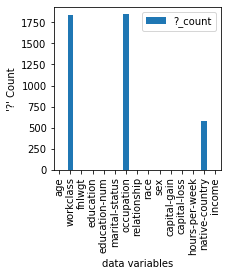

In [6]:
special_df = pd.DataFrame(columns=['name','?_count'])
for i in data.columns.tolist():
    if any(data[data[i] == '?']):
        special_df = special_df.append({'name':i, '?_count':len(data[data[i] == '?'])}, ignore_index=True)
        #print("{}:{}".format(i, len(data[data[i] == '?'])))

print(special_df)

#plotting special character '?' data 
special_df.plot(kind = 'bar',figsize = (3,3))
plt.xticks(range(len(special_df)), data.columns.tolist())
plt.xlabel("data variables")
plt.ylabel("'?' Count")
plt.show()

In [7]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### 2.4.2 Removing special character data from the data set

In [8]:
data = data[data["workclass"] != '?']
data = data[data["occupation"] != '?']
data = data[data["native-country"] != '?']

print("New length of dataset after removeing special character data: {}".format(len(data)))

New length of dataset after removeing special character data: 30162


### 2.5 Class distribution

In [9]:
data['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

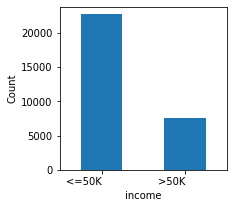

In [10]:
data['income'].value_counts().plot(kind = 'bar',figsize = (3,3))
plt.xticks(rotation=0, ha='right')
plt.xlabel("income")
plt.ylabel("Count")
plt.show()

### 2.6 Data Correlation
#### 2.6.1 Converting categorical columns in numbers for correlation

In [11]:
data_for_corr = data.copy()
categorical_columns = data.select_dtypes(exclude=["number"]).columns.tolist()
for i in categorical_columns:
    data_for_corr[i] = data_for_corr[i].astype('category').cat.codes

#### 2.6.2 Plotting Data correlation

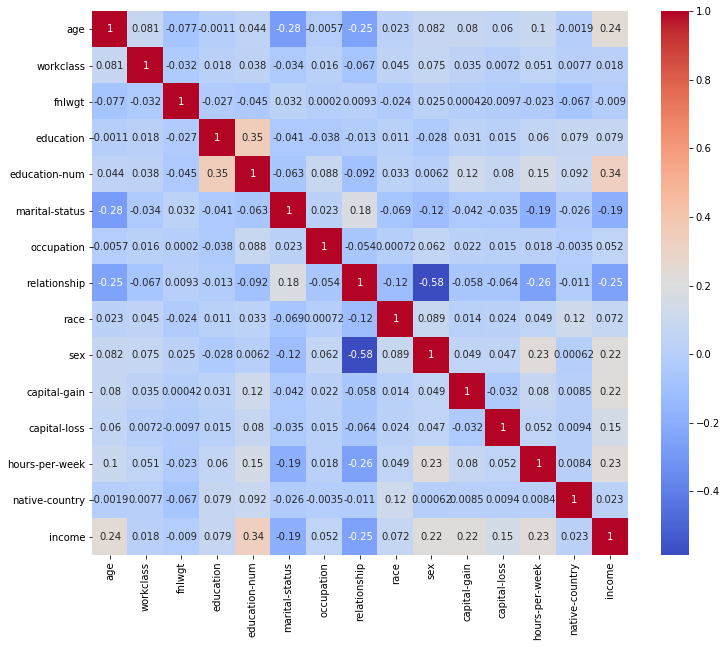

In [12]:
# data_for_corr.corr()
# Lets see types of relationships across the entire data set
# sns.pairplot(data_for_corr)

#Correlation between variables
plt.figure(figsize=(12,10))
#matrix = np.triu(data_for_corr.corr())
sns.heatmap(data_for_corr.corr(),annot=True, cmap ='coolwarm') #, mask = matrix)
plt.show()

#### 2.6.7 Based on initial analysis

Based on initial analysis, identified below features that are correlated with class label "Income"

Features that are positively correlated with income (with correlation > 0.20): 
* education-num, 
* age,
* sex, 
* capital-gain, 
* hours-per-week,

Features that are negatively correlated with income (with correlation < -0.18)
* relationship
* marital-status

### 2.7  Further analysis on identified features

#### 2.7.1 education-num vs income

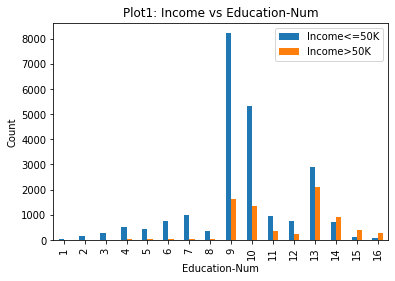

In [13]:
income_above50=data[(data['income']== '>50K')]
income_below50=data[(data['income']== '<=50K')]#Income vs Education-Num
data_income_above50=income_above50['education-num'].value_counts()
data_income_below50=income_below50['education-num'].value_counts()
df=pd.DataFrame({'Income<=50K': data_income_below50, 'Income>50K': data_income_above50})
df.plot(kind="bar")
plt.title("Plot1: Income vs Education-Num")
plt.xlabel("Education-Num")
plt.ylabel("Count")
plt.show()

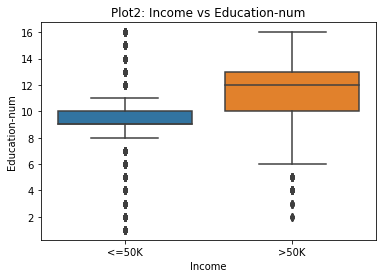

In [14]:
data_less_50 = data[data['income'] == "<=50K"]
data_greater_50 = data[(data['income'] == ">50K")]
#these are the three interesting box plots
import seaborn as sns
#sns.boxplot(data=[data_less_50['age'],data_greater_50['age']])
#sns.boxplot(data=[data_less_50['fnlwgt'],data_greater_50['fnlwgt']])
#sns.boxplot(data=[data_less_50['hours-per-week'],data_greater_50['hours-per-week']])
sns.boxplot(data=[data_less_50['education-num'],data_greater_50['education-num']])
plt.xticks(range(0,2), ['<=50K','>50K'])
#plt.yticks(range(1,17,1))
plt.xlabel("Income")
plt.ylabel("Education-num")
plt.title("Plot2: Income vs Education-num")
plt.show()

#### 2.7.2.1 age vs income

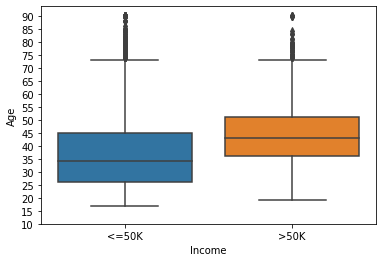

In [15]:
data_less_50 = data[data['income'] == "<=50K"]
data_greater_50 = data[(data['income'] == ">50K")]
#these are the three interesting box plots
import seaborn as sns
sns.boxplot(data=[data_less_50['age'],data_greater_50['age']])
#sns.boxplot(data=[data_less_50['fnlwgt'],data_greater_50['fnlwgt']])
#sns.boxplot(data=[data_less_50['hours-per-week'],data_greater_50['hours-per-week']])
plt.xticks(range(0,2), ['<=50K','>50K'])
plt.yticks(range(10,95,5))
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

#### 2.7.2.2 age vs capital-gain vs income

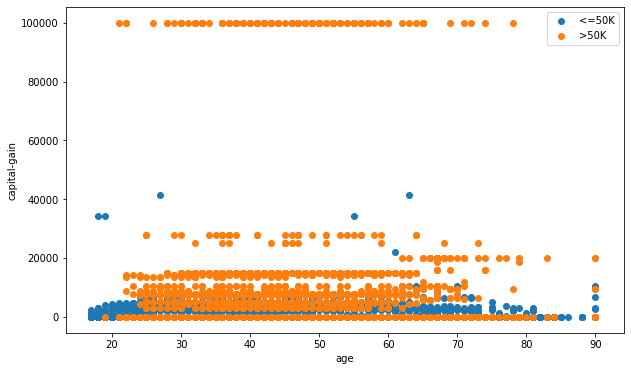

In [16]:
Below_equal_50 = data[(data['income'] == "<=50K")]
Above_50 = data[(data['income'] == ">50K")]

plt.figure(figsize=(10,6))
plt.scatter(Below_equal_50['age'], Below_equal_50['capital-gain'])
plt.scatter(Above_50['age'], Above_50['capital-gain'])
plt.legend(data['income'].value_counts().index.tolist())
plt.xlabel("age")
plt.ylabel("capital-gain")
plt.show()

#### 2.7.3 sex vs income

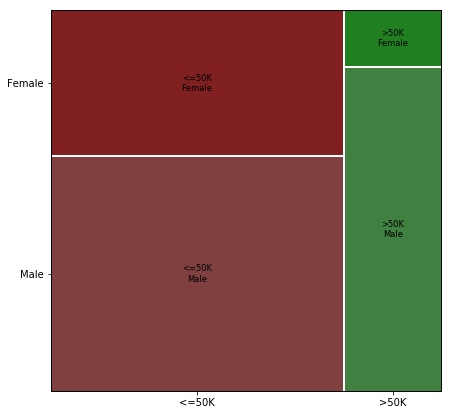

In [17]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(7,7)
mosaic(data, ['income','sex'])
plt.show()

#### 2.7.4 hours-per-week vs income

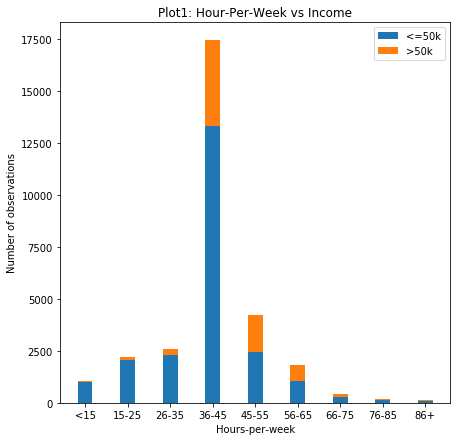

In [18]:
data_less_50 = data[(data['income'] == "<=50K")]
data_greater_50 = data[(data['income'] == ">50K")]
#these are the three interesting box plots
# import seaborn as sns
# sns.boxplot(data=[data_less_50['hours-per-week'],data_greater_50['hours-per-week']]) 
bins = [0, 15, 25, 35, 45, 55, 65, 75, 85, np.inf]
labels = ['<15', '15-25', '26-35', '36-45', '45-55', '56-65', '66-75','76-85','86+']
data_less_50 = data_less_50.groupby(['income', pd.cut(data_less_50['hours-per-week'], bins)])
data_greater_50 = data_greater_50.groupby(['income', pd.cut(data_greater_50['hours-per-week'], bins)])
data_less_50 = data_less_50.size()
data_greater_50 = data_greater_50.size()
#print(data_less_50)
# labels=["<10", "11-20", "21-30", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", ">90"]
width = 0.35 
fig, ax = plt.subplots()
ax.bar(labels, data_less_50, width, label='<=50k')
ax.bar(labels, data_greater_50, width, bottom=data_less_50,label='>50k')
plt.xlabel("Hours-per-week")
plt.ylabel("Number of observations")
plt.title("Plot1: Hour-Per-Week vs Income")
ax.legend()
plt.show()

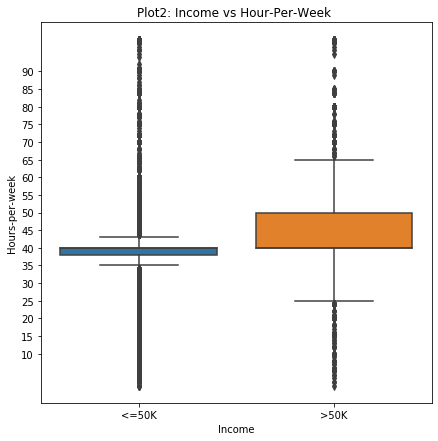

In [19]:
data_less_50 = data[data['income'] == "<=50K"]
data_greater_50 = data[(data['income'] == ">50K")]
#these are the three interesting box plots
import seaborn as sns
#sns.boxplot(data=[data_less_50['age'],data_greater_50['age']])
#sns.boxplot(data=[data_less_50['fnlwgt'],data_greater_50['fnlwgt']])
sns.boxplot(data=[data_less_50['hours-per-week'],data_greater_50['hours-per-week']])
plt.xticks(range(0,2), ['<=50K','>50K'])
plt.yticks(range(10,95,5))
plt.xlabel("Income")
plt.ylabel("Hours-per-week")
plt.title("Plot2: Income vs Hour-Per-Week ")
plt.show()

#### 2.7.5 relationship vs income

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


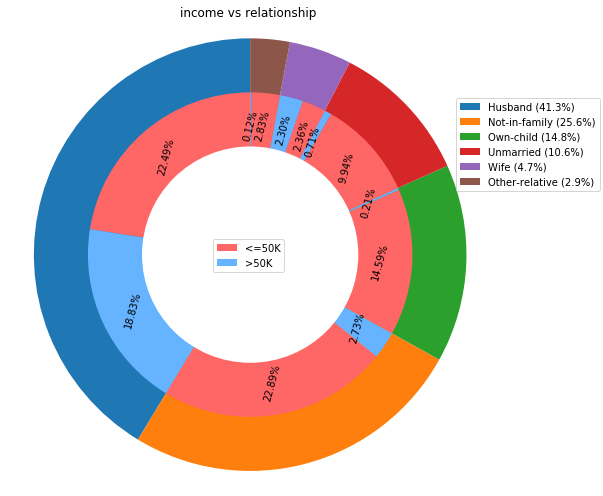

In [20]:
import matplotlib.pyplot as plt
features = ['relationship'] #'education-num','marital-status',,'sex'
label = ['income']


for i in range(0,1):
    feature_counts = data[features[i]].value_counts()
    categories_in_feature = data[features[i]].value_counts().index.tolist()
    label_cats = [['<=50K','>50K']]* len(categories_in_feature)
    label_color = ['#ff6666', '#66b3ff',]* len(categories_in_feature)
    label_counts = []
    
    fig = plt.figure(figsize = (7,7))
    for category in categories_in_feature:
        label_counts += data[data[features[i]] == category][label[0]].value_counts().tolist()
    
    patches1,_ = plt.pie(feature_counts, startangle=90,frame=True)
    patches2,_,p = plt.pie(label_counts, colors=label_color,pctdistance=0.8,
                           radius=0.75,startangle=90,autopct='%1.2f%%')
    [t.set_rotation(75) for t in p]
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
   
    fig.legend(patches1,bbox_to_anchor=(1.20, 0.8),
               labels=['%s (%1.1f%%)' %(f, (c/feature_counts.sum())*100) 
                                 for f, c in zip(categories_in_feature, feature_counts)])
    

    
    plt.legend(patches2, label_cats[0], loc="center")
    plt.title('{1} vs {0}'.format(features[i], label[0]))
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
 
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

#### 2.7.6 marital-status vs income

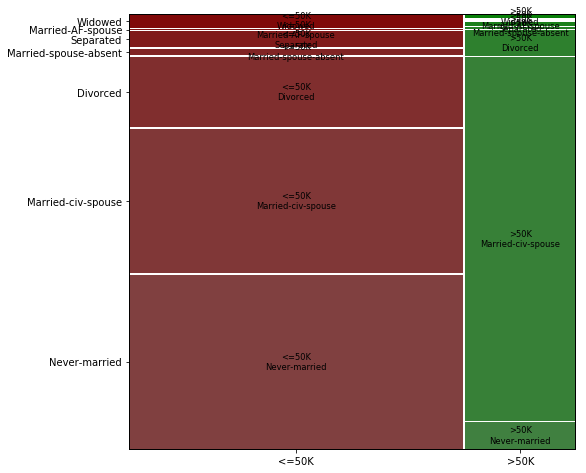

In [21]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(8,8)
mosaic(data, ['income','marital-status'])

plt.show()

## 3. Data Pre-processing
* #### Features and Label Seperation
* #### converting categorical variables
* #### Feature scaling
* #### splitting data into train and test

In [22]:
# Seperating Features as X and label as y
features = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
X = data[features]
y = data[['income']]

# Converting categorical variables into 0's and 1's using pandas get_dummies
X = pd.get_dummies(X,drop_first=True)
y = pd.get_dummies(y,drop_first=True)

# Features scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Spliting data into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=99)
for item in [X_train,X_test,y_train,y_test]:
    print(item.shape)

(21113, 96)
(9049, 96)
(21113, 1)
(9049, 1)


In [23]:
pd.DataFrame(y_test, columns= y.columns).head(3)

,income_>50K
22320,0
22913,1
9065,0


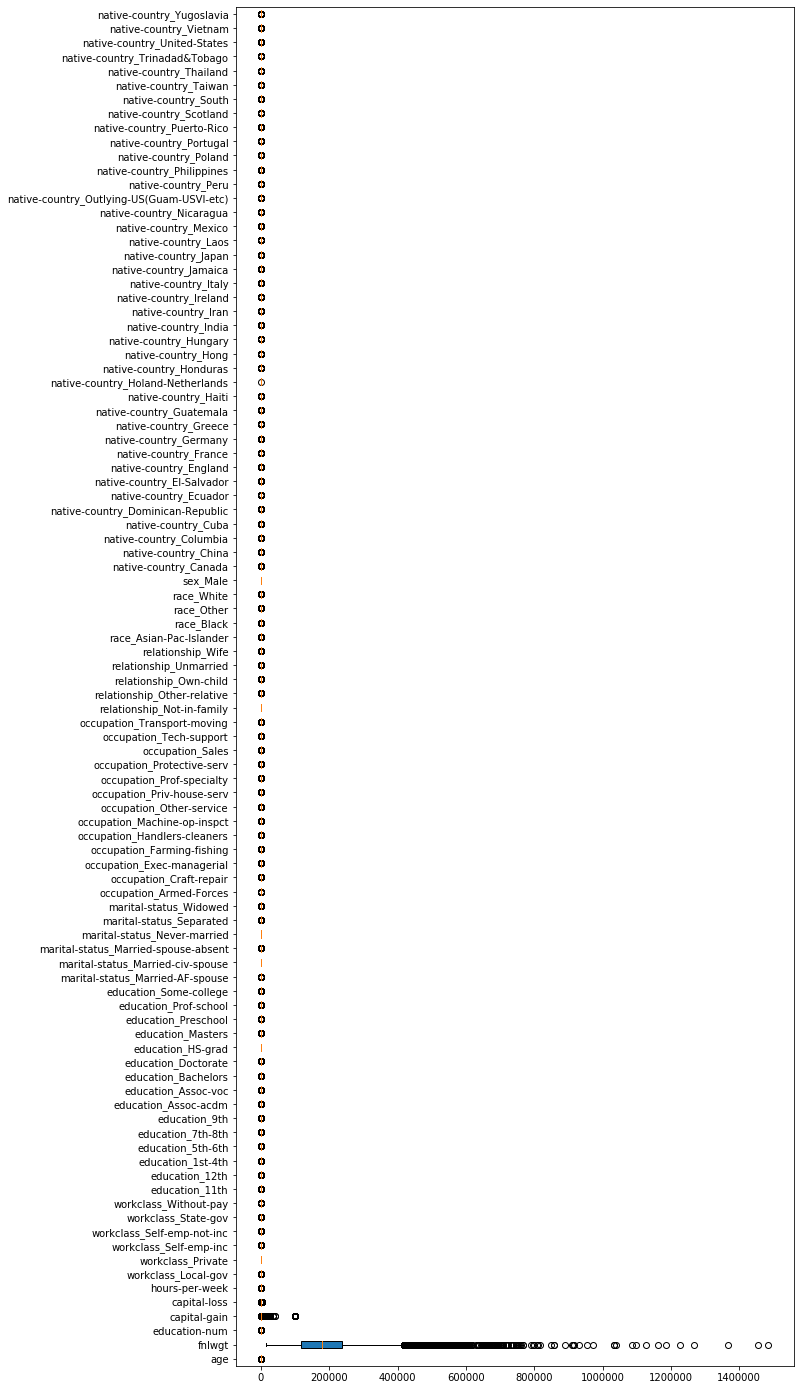

In [24]:
plt.figure(figsize=(10,25))
plt.boxplot(X.values,labels=X.columns,vert=False,patch_artist=True)
plt.show()

## 4.Implementing different Classifiction models
Given the features these models will predict if the income is less than equal to 50k (label 0) or greater to 50k (label 1)

#### Logistic Regression clasifier

Training set accuracy: 0.852
Test set accuracy: 0.845
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6813
           1       0.73      0.59      0.65      2236

    accuracy                           0.85      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.85      0.84      9049

Logistic Regression Feature importance
--------------------------------------


C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


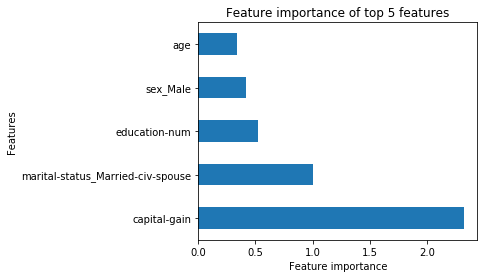

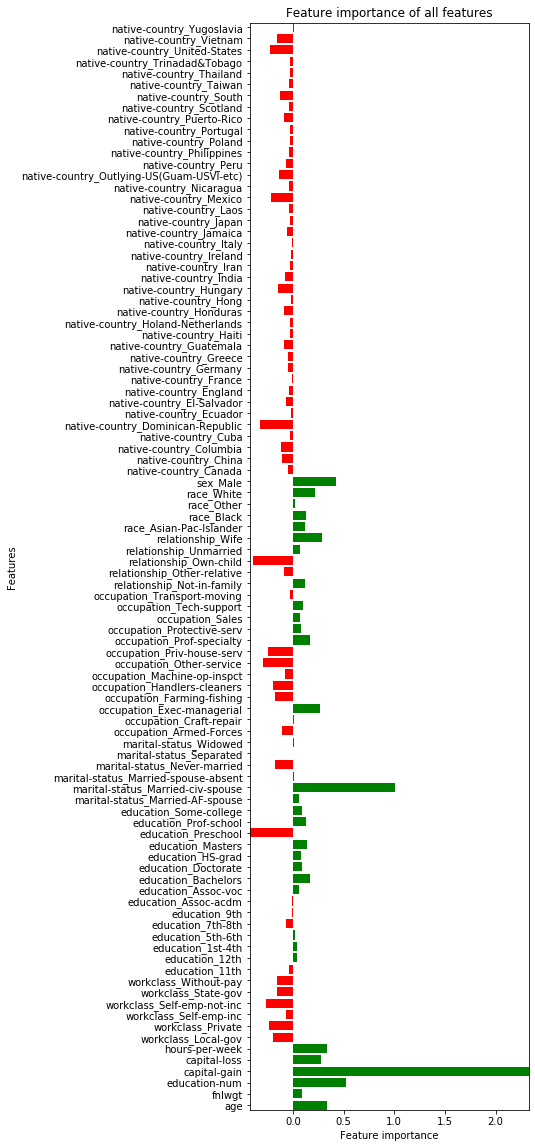

In [35]:
# Logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log_classifier = LogisticRegression(random_state = 99).fit(X_train, y_train.values.ravel())
lr_pred = log_classifier.predict(X_test)
# Feature importance of all features
importance = pd.Series(log_classifier.coef_[0],index=X.columns)

print("Training set accuracy: {:.3f}".format(log_classifier.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(log_classifier.score(X_test, y_test)))
print(classification_report(y_test,lr_pred))

print("Logistic Regression Feature importance")
print("--------------------------------------")



# Feature importance of top 10 features
importance.nlargest(5).plot(kind='barh',figsize=(5,4))
plt.title("Feature importance of top 5 features")
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(5,20))
plt.margins(0,0)
plt.barh(range(96), importance, color=(importance> 0).map({True: 'g',False: 'r'}))
plt.title("Feature importance of all features")
plt.yticks(np.arange(96), X)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Decision Tree clasifier

Accuracy on training set: 0.842
Accuracy on test set: 0.836
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6813
           1       0.76      0.49      0.60      2236

    accuracy                           0.84      9049
   macro avg       0.80      0.72      0.75      9049
weighted avg       0.83      0.84      0.82      9049

Decision Tree Feature importance
--------------------------------


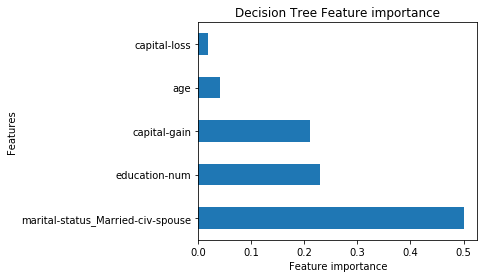

In [26]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 99).fit(X_train, y_train.values.ravel())
dt_pred = dt_classifier.predict(X_test)
print("Accuracy on training set: {:.3f}".format(dt_classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt_classifier.score(X_test, y_test)))
print(classification_report(y_test,dt_pred))

print("Decision Tree Feature importance")
print("--------------------------------")
# Decision tree Feature importance of top ten features
feat_importances = pd.Series(dt_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',figsize=(5,4))
plt.title("Decision Tree Feature importance")
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Random Forest

Accuracy on training set: 0.814
Accuracy on test set: 0.810
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      6813
           1       0.91      0.25      0.40      2236

    accuracy                           0.81      9049
   macro avg       0.86      0.62      0.64      9049
weighted avg       0.83      0.81      0.77      9049

Random Forest Feature importance
--------------------------------


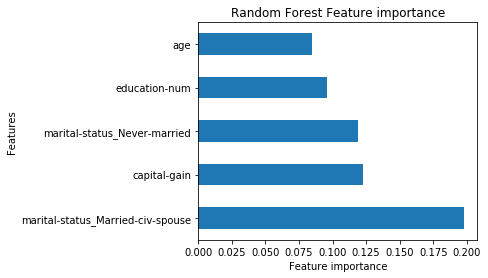

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000,criterion='entropy',max_depth=4)
rf_classifier.fit(X_train, y_train.values.ravel())
rf_pred = rf_classifier.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf_classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_classifier.score(X_test, y_test)))
print(classification_report(y_test,rf_pred))

print("Random Forest Feature importance")
print("--------------------------------")
# Random Forest Feature importance with top 10 features 
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',figsize=(5,4))
plt.title("Random Forest Feature importance")
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

#### Support Vector Machine (Linear)

Accuracy on training set: 0.849
Accuracy on test set: 0.844
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      6813
           1       0.91      0.25      0.40      2236

    accuracy                           0.81      9049
   macro avg       0.86      0.62      0.64      9049
weighted avg       0.83      0.81      0.77      9049

Support Vector Machine Feature importance
-----------------------------------------


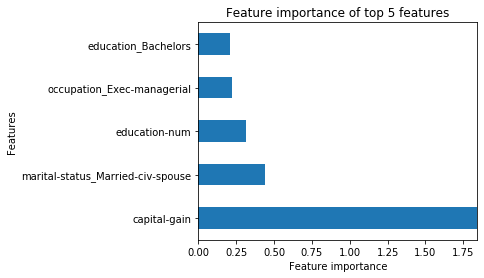

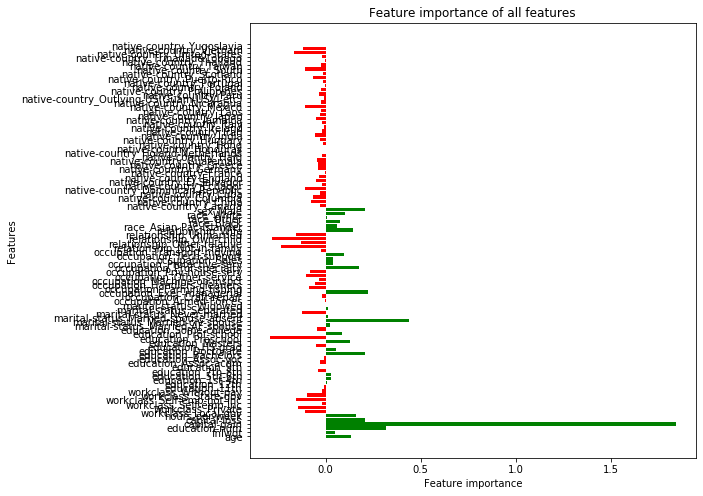

In [28]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear',random_state = 99).fit(X_train, y_train.values.ravel())
svm_pred = rf_classifier.predict(X_test)
print("Accuracy on training set: {:.3f}".format(svm_classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_classifier.score(X_test, y_test)))
print(classification_report(y_test,svm_pred))

print("Support Vector Machine Feature importance")
print("-----------------------------------------")
# Feature importance of all features
plt.figure(figsize=(5,25))
plt.margins(0,0)
importance = pd.Series(svm_classifier.coef_[0],index=X.columns)


# Feature importance of top 10 features
importance.nlargest(5).plot(kind='barh',figsize=(5,4))
plt.title("Feature importance of top 5 features")
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

plt.barh(range(96), importance, color=(importance> 0).map({True: 'g',False: 'r'}))
plt.title("Feature importance of all features")
plt.yticks(np.arange(96), X)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

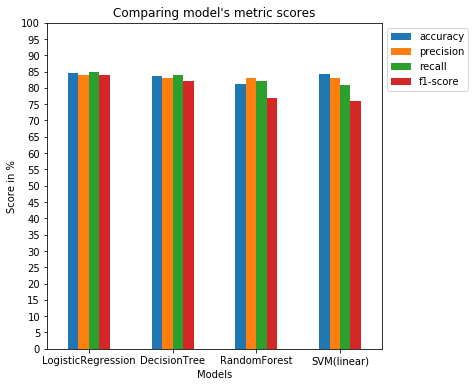

In [29]:
results = [['LogisticRegression', 84.5,84,85,84],
           ['DecisionTree', 83.6,83,84,82],
           ['RandomForest', 81.1,83,82,77],
           ['SVM(linear)', 84.4,83,81,76]]
results_df = pd.DataFrame(results, columns =['model','accuracy','precision','recall','f1-score'])

#Plotting results
results_df.plot(kind ='bar',figsize=(6,6))
plt.xticks(range(len(results_df)), results_df.iloc[:,0].tolist(),rotation=0)
plt.yticks(np.arange(0, 105,5))
plt.xlabel("Models")
plt.ylabel("Score in %")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Comparing model's metric scores")
plt.show()

In [30]:
results_df

,model,accuracy,precision,recall,f1-score
0,LogisticRegression,84.5,84,85,84
1,DecisionTree,83.6,83,84,82
2,RandomForest,81.1,83,82,77
3,SVM(linear),84.4,83,81,76
